<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Carga desde un archivo .xlsx sin indice
Mexico= pd.read_csv("Mexico.csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26401 non-null  object 
 1   source                                        26401 non-null  object 
 2   name                                          26401 non-null  object 
 3   description                                   25633 non-null  object 
 4   neighborhood_overview                         13970 non-null  object 
 5   host_id                                       26401 non-null  int64  
 6   host_name                                     25544 non-null  object 
 7   host_since                                    25487 non-null  object 
 8   host_location                                 20164 non-null  object 
 9   host_about                                    15164 non-null 

**Determinación de Clases para datos agrupados**


In [10]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [4]:
#Corroboramos valores nulos
valores_nulos=Mexico.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       768
neighborhood_overview                           12431
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                                3373
Length: 71, dtype: int64

In [5]:
#Calculamos el numero total de la población "n"
Mexico['host_total_listings_count']. info()
n=26401

<class 'pandas.core.series.Series'>
RangeIndex: 26401 entries, 0 to 26400
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
25487 non-null  float64
dtypes: float64(1)
memory usage: 206.4 KB


In [6]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Mexico['host_total_listings_count'].max()
Min=Mexico['host_total_listings_count'].min()
Limites= [Min, Max]
Limites

[1.0, 946.0]

In [7]:
#Calculamos el rango R
R=Max-Min
R

945.0

In [8]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [9]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

60.26870408729137

**Creación de Categorias a partir de clases**

In [10]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(.99, 946.1, 16)
intervalos

array([  0.99      ,  63.99733333, 127.00466667, 190.012     ,
       253.01933333, 316.02666667, 379.034     , 442.04133333,
       505.04866667, 568.056     , 631.06333333, 694.07066667,
       757.078     , 820.08533333, 883.09266667, 946.1       ])

In [11]:
#Creamos las categorías 
categorias= ["Categoría1 (0-63.99 host_total_listings_count)", "Categoría2 (64-127 host_total_listings_count)","Categoría3 (128-190 host_total_listings_count)", "Categoría4 (191-253 host_total_listings_count)",
             "Categoría5 (254-316 host_total_listings_count)", "Categoría6 (317-379 host_total_listings_count)","Categoría7 (380-442 host_total_listings_count)", "Categoría8 (443-505 host_total_listings_count)", "Categoría9 (506-568 host_total_listings_count)", "Categoría10 (569-631 host_total_listings_count)","Categoría11 (632-694 host_total_listings_count)", "Categoría12 (695-757 host_total_listings_count)",
             "Categoría13 (758-820 host_total_listings_count)", "Categoría14 (821-883 host_total_listings_count)","Categoría15 (884-946.1 host_total_listings_count)"
             ]

In [12]:
#Finalmente creamos las categorías en la columna numérica
Mexico['host_total_listings_count']=pd.cut(x= Mexico['host_total_listings_count'], bins=intervalos, labels= categorias)
Mexico['host_total_listings_count']

0        Categoría1 (0-63.99 host_total_listings_count)
1        Categoría1 (0-63.99 host_total_listings_count)
2        Categoría1 (0-63.99 host_total_listings_count)
3        Categoría1 (0-63.99 host_total_listings_count)
4        Categoría1 (0-63.99 host_total_listings_count)
                              ...                      
26396    Categoría1 (0-63.99 host_total_listings_count)
26397    Categoría1 (0-63.99 host_total_listings_count)
26398    Categoría1 (0-63.99 host_total_listings_count)
26399    Categoría1 (0-63.99 host_total_listings_count)
26400    Categoría1 (0-63.99 host_total_listings_count)
Name: host_total_listings_count, Length: 26401, dtype: category
Categories (15, object): ['Categoría1 (0-63.99 host_total_listings_count)' < 'Categoría2 (64-127 host_total_listings_count)' < 'Categoría3 (128-190 host_total_listings_count)' < 'Categoría4 (191-253 host_total_listings_count)' ... 'Categoría12 (695-757 host_total_listings_count)' < 'Categoría13 (758-820 host_total_list

In [13]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Mexico['host_total_listings_count'].value_counts().reset_index()
Tabla_freq

host_total_listings_count  count
0      Categoría1 (0-63.99 host_total_listings_count)  23262
1       Categoría2 (64-127 host_total_listings_count)   1125
2   Categoría15 (884-946.1 host_total_listings_count)    319
3      Categoría5 (254-316 host_total_listings_count)    238
4      Categoría4 (191-253 host_total_listings_count)    187
5      Categoría3 (128-190 host_total_listings_count)    174
6      Categoría7 (380-442 host_total_listings_count)    134
7     Categoría13 (758-820 host_total_listings_count)     31
8      Categoría8 (443-505 host_total_listings_count)     15
9     Categoría10 (569-631 host_total_listings_count)      1
10    Categoría11 (632-694 host_total_listings_count)      1
11     Categoría6 (317-379 host_total_listings_count)      0
12     Categoría9 (506-568 host_total_listings_count)      0
13    Categoría12 (695-757 host_total_listings_count)      0
14    Categoría14 (821-883 host_total_listings_count)      0

In [14]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

host_total_listings_count  count
0      Categoría1 (0-63.99 host_total_listings_count)  23262
1       Categoría2 (64-127 host_total_listings_count)   1125
2   Categoría15 (884-946.1 host_total_listings_count)    319
3      Categoría5 (254-316 host_total_listings_count)    238
4      Categoría4 (191-253 host_total_listings_count)    187
5      Categoría3 (128-190 host_total_listings_count)    174
6      Categoría7 (380-442 host_total_listings_count)    134
7     Categoría13 (758-820 host_total_listings_count)     31
8      Categoría8 (443-505 host_total_listings_count)     15
9     Categoría10 (569-631 host_total_listings_count)      1
10    Categoría11 (632-694 host_total_listings_count)      1

In [15]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('host_total_listings_count')
Filtro_index

count
host_total_listings_count                               
Categoría1 (0-63.99 host_total_listings_count)     23262
Categoría2 (64-127 host_total_listings_count)       1125
Categoría15 (884-946.1 host_total_listings_count)    319
Categoría5 (254-316 host_total_listings_count)       238
Categoría4 (191-253 host_total_listings_count)       187
Categoría3 (128-190 host_total_listings_count)       174
Categoría7 (380-442 host_total_listings_count)       134
Categoría13 (758-820 host_total_listings_count)       31
Categoría8 (443-505 host_total_listings_count)        15
Categoría10 (569-631 host_total_listings_count)        1
Categoría11 (632-694 host_total_listings_count)        1

Text(0, 0.5, 'Frecuencia')

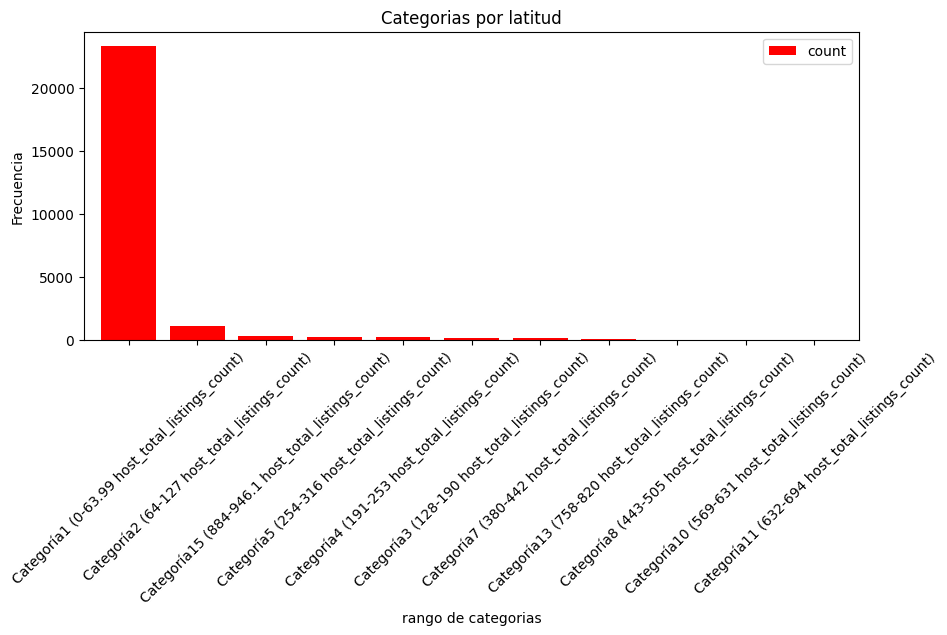

In [16]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')